In [1]:
import os

import numpy as np
import pandas as pd
from scipy.io import wavfile, loadmat
from scipy import signal

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision.transforms import Compose

# from sklearn.metrics import 

import tensorboardX
from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
audio_path = 'Y8hIVOBuels_0000002.wav'
# read
rate, samples = wavfile.read(audio_path)

## parameters
window = 'hamming'
# window width and step size
Tw = 25
Ts = 10
# frame duration (samples)
Nw = int(rate * Tw * 1e-3)
# overlapped duration (samples)
# 2 ** to the next pow of 2
Ns = int(rate * (Tw - Ts) * 1e-3)
nfft = 2 ** (Nw - 1).bit_length()
pre_emphasis = 0.97

# preemphasis filtering
samples = np.append(samples[0], samples[1:] - pre_emphasis * samples[:-1])

# spectogram
frequencies, times, spectrogram = signal.spectrogram(samples, rate, window, Nw, Ns, nfft, 
                                mode='magnitude', return_onesided=False)

spectrogram*=1600

print(spectrogram.shape)

(512, 1110)


/home/vladimir/venv/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [3]:
spectrogram[256:, :].mean()

1866.0535451417318

(512, 1110)


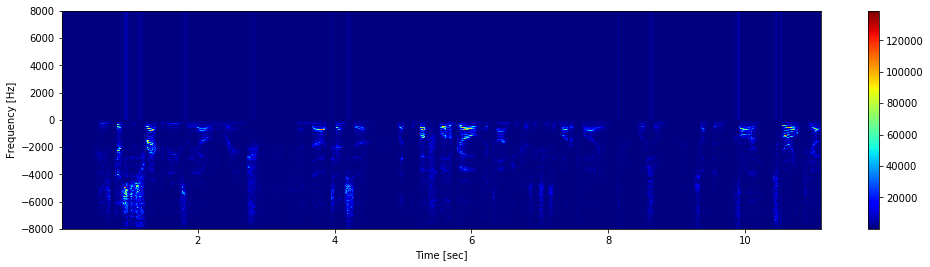

In [4]:
plt.figure(figsize=(17, 4))
plt.pcolormesh(times, frequencies, spectrogram, cmap=plt.cm.jet)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
print(spectrogram.shape)
plt.show()

In [5]:
# mat = loadmat('SPEC.mat')
mat = loadmat('SPEC.mat')

(512, 1110)


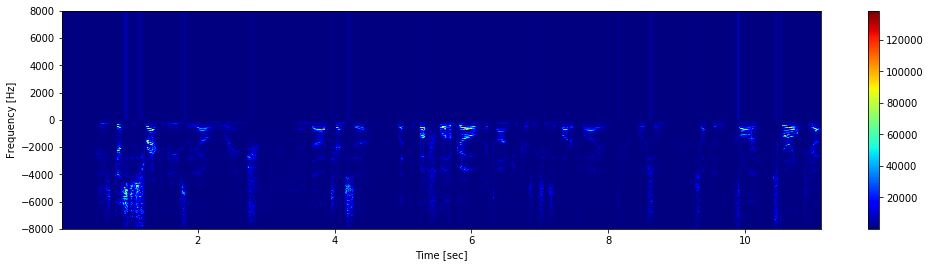

In [6]:
plt.figure(figsize=(17, 4))
plt.pcolormesh(times, frequencies, mat['SPEC'], cmap=plt.cm.jet)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
print(spectrogram.shape)
plt.show()

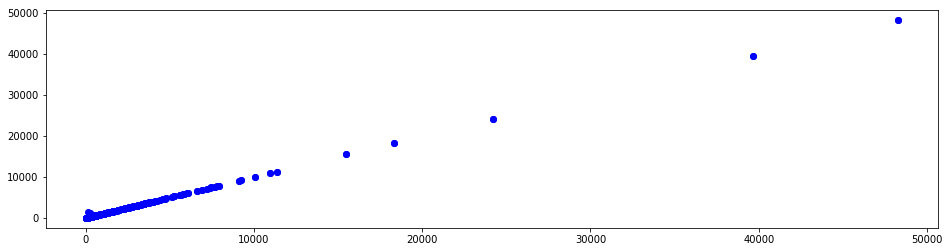

In [11]:
plt.figure(figsize=(16, 4))
plt.plot(mat['SPEC'][:, 200], spectrogram[:, 200], 'bo')

In [8]:
spectrogram[:, 200] / mat['SPEC'][:, 200]
np.abs(spectrogram[:, 200] - mat['SPEC'][:, 200]).sum()

6631.199191851552

<Figure size 1152x288 with 0 Axes>

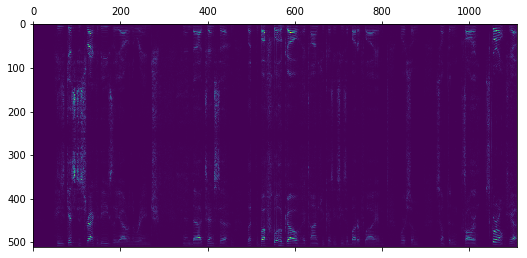

In [21]:
plt.matshow(spectrogram);

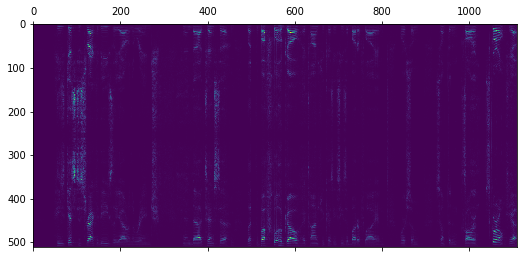

In [22]:
plt.matshow(mat['SPEC']);